## 

# STROKE PREDICTION PROJECT

## 1. Data Preparation

In [20]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [22]:
df.columns = df.columns.str.lower()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [23]:
df = df.drop('id', axis=1)

## 2. Setting up the validation framework

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [26]:
len(df_full_train), len(df_test)

(4088, 1022)

In [27]:
df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## 2. EDA

In [28]:
df_full_train = df_full_train.reset_index(drop=True)

In [29]:
df_full_train.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  160
smoking_status         0
stroke                 0
dtype: int64

In [30]:
median_bmi = df_full_train['bmi'].median()
df_full_train['bmi'] = df_full_train['bmi'].fillna(median_bmi)

In [31]:
df_full_train.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [32]:
df_full_train.stroke.value_counts(normalize=True)

stroke
0    0.953767
1    0.046233
Name: proportion, dtype: float64

In [33]:
df_full_train.stroke.mean()

np.float64(0.046232876712328765)

In [34]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [35]:
numerical = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical.remove('stroke')

In [37]:
df_full_train[categorical].nunique()

gender            2
ever_married      2
work_type         5
residence_type    2
smoking_status    4
dtype: int64

## 3. Feature importance: Churn rate, risk ratio,Mutual information and Correlation


In [38]:
from IPython.display import display

In [39]:
global_stroke = df_full_train.stroke.mean()
global_stroke

np.float64(0.046232876712328765)

In [40]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).stroke.agg(['mean', 'count'])
    df_group['diff'] = global_stroke - df_group['mean']
    df_group['risk'] = df_group['mean'] / global_stroke
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
Female,0.047919,2379,-0.001686,1.036477
Male,0.043885,1709,0.002348,0.949223




ever_married


,mean,count,diff,risk
ever_married,,,,
No,0.019244,1403,0.026988,0.416251
Yes,0.060335,2685,-0.014102,1.305028




work_type


,mean,count,diff,risk
work_type,,,,
Govt_job,0.046065,521,0.000168,0.996374
Never_worked,0.000000,19,0.046233,0.000000
Private,0.049441,2326,-0.003208,1.069393
Self-employed,0.072838,659,-0.026605,1.575451
children,0.003552,563,0.042680,0.076837




residence_type


,mean,count,diff,risk
residence_type,,,,
Rural,0.042289,2010,0.003944,0.914686
Urban,0.050048,2078,-0.003815,1.082522




smoking_status


,mean,count,diff,risk
smoking_status,,,,
Unknown,0.030376,1251,0.015857,0.657015
formerly smoked,0.071629,712,-0.025396,1.549313
never smoked,0.047428,1497,-0.001195,1.025854
smokes,0.046178,628,0.000055,0.998820


In [41]:
from sklearn.metrics import mutual_info_score

In [42]:
def mutual_info_stroke_score(series):
    return mutual_info_score(series, df_full_train.stroke)

In [43]:
mi = df_full_train[categorical].apply(mutual_info_stroke_score)
mi.sort_values(ascending=False)

work_type         0.006146
ever_married      0.004960
smoking_status    0.002092
residence_type    0.000171
gender            0.000045
dtype: float64

In [44]:
df_full_train[numerical].corrwith(df_full_train.stroke).abs()

age                  0.235947
hypertension         0.124816
heart_disease        0.132295
avg_glucose_level    0.117430
bmi                  0.035747
dtype: float64

## One-hot encoding

In [45]:
from sklearn.feature_extraction import DictVectorizer

def one_hot_encode(df_train_fold, df_val_fold, categorical, numerical):
    """
    Performs one-hot encoding using DictVectorizer.
    Fits on training fold, transforms both training and validation folds.
    """

    # Convert dataframes into list-of-dicts
    train_dict = df_train_fold[categorical + numerical].to_dict(orient='records')
    val_dict   = df_val_fold[categorical + numerical].to_dict(orient='records')

    # Fit DictVectorizer ONLY on training data
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    X_val   = dv.transform(val_dict)

    return X_train, X_val, dv


## k-fold cross-validation and Training logistic regression with Scikit-Learn

In [73]:
# ============================================
#  IMPORTS
# ============================================
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# ============================================
#  K-FOLD SETUP
# ============================================
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []
roc_curves = []   # stores (fpr, tpr) per fold

# ============================================
#  K-FOLD LOOP  (ROC-AUC ONLY)
# ============================================
for fold, (train_idx, val_idx) in enumerate(kfold.split(df_full_train), start=1):

    # Split fold
    df_train_fold = df_full_train.iloc[train_idx].copy()
    df_val_fold   = df_full_train.iloc[val_idx].copy()

    # Extract target
    y_train = df_train_fold.stroke.values
    y_val   = df_val_fold.stroke.values

    # Remove target column
    df_train_fold = df_train_fold.drop(columns=["stroke"])
    df_val_fold   = df_val_fold.drop(columns=["stroke"])

    # Dict → one-hot encode
    train_dict = df_train_fold.to_dict(orient='records')
    val_dict   = df_val_fold.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    X_val   = dv.transform(val_dict)

    # Scale numerical features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val   = scaler.transform(X_val)

    # Train model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred = model.predict_proba(X_val)[:, 1]

    # ROC-AUC
    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)

    print(f"Fold {fold} → ROC-AUC: {auc:.4f}")

    # Save ROC curve points
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    roc_curves.append((fpr, tpr))

# ============================================
#  FINAL MEAN PERFORMANCE
# ============================================
print("\n========================")
print("Mean ROC-AUC:", np.mean(auc_scores))
print("========================")

Fold 1 → ROC-AUC: 0.8202
Fold 2 → ROC-AUC: 0.8413
Fold 3 → ROC-AUC: 0.8529
Fold 4 → ROC-AUC: 0.8174
Fold 5 → ROC-AUC: 0.8247

Mean ROC-AUC: 0.8313149782509524


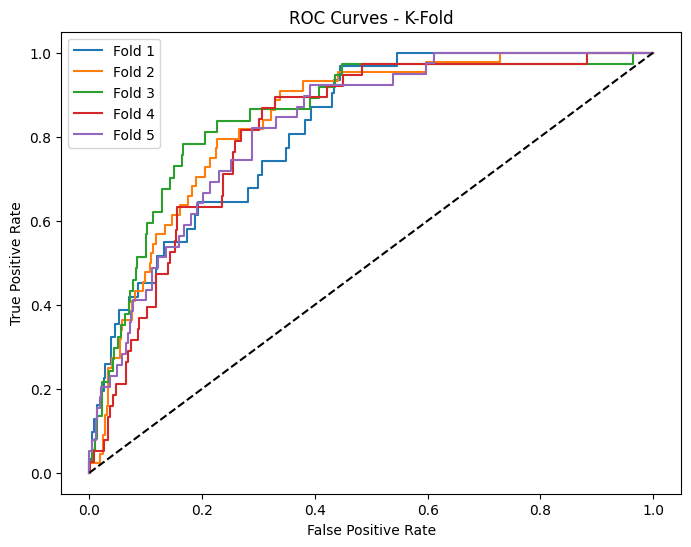

In [74]:
plt.figure(figsize=(8,6))
for i, (fpr, tpr) in enumerate(roc_curves):
    plt.plot(fpr, tpr, label=f'Fold {i+1}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - K-Fold")
plt.legend()
plt.show()


## Logistic Regression parameter tuning  

In [58]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
from itertools import product

# Search space
Cs = [0.001, 0.01, 0.1, 1, 10]
class_weights = [None, 'balanced']

results = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C, cw in product(Cs, class_weights):
    fold_scores = []

    for train_idx, val_idx in kfold.split(df_full_train):

        df_train_fold = df_full_train.iloc[train_idx]
        df_val_fold   = df_full_train.iloc[val_idx]

        # Extract y
        y_train_fold = df_train_fold.stroke.values
        y_val_fold   = df_val_fold.stroke.values

        # REMOVE TARGET FROM FEATURES  ← FIX
        df_train_fold = df_train_fold.drop(columns=["stroke"])
        df_val_fold   = df_val_fold.drop(columns=["stroke"])

        # One-hot encoding
        train_dict = df_train_fold.to_dict(orient='records')
        val_dict   = df_val_fold.to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(train_dict)
        X_val   = dv.transform(val_dict)

        # Scale
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val   = scaler.transform(X_val)

        # Model
        model = LogisticRegression(
            C=C,
            penalty='l2',
            class_weight=cw,
            solver='lbfgs',
            max_iter=1000
        )
        model.fit(X_train, y_train_fold)

        y_pred = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val_fold, y_pred)
        fold_scores.append(auc)

    mean_auc = np.mean(fold_scores)
    results.append((C, cw, mean_auc))
    print(f"C={C}, class_weight={cw} → AUC={mean_auc:.4f}")

# Best combination
best = max(results, key=lambda x: x[2])
print("\n==============================")
print(f"BEST PARAMETERS:")
print(f"C = {best[0]}")
print(f"class_weight = {best[1]}")
print(f"ROC-AUC = {best[2]:.4f}")
print("==============================")

C=0.001, class_weight=None → AUC=0.7957
C=0.001, class_weight=balanced → AUC=0.8097
C=0.01, class_weight=None → AUC=0.8197
C=0.01, class_weight=balanced → AUC=0.8283
C=0.1, class_weight=None → AUC=0.8304
C=0.1, class_weight=balanced → AUC=0.8303
C=1, class_weight=None → AUC=0.8313
C=1, class_weight=balanced → AUC=0.8305
C=10, class_weight=None → AUC=0.8314
C=10, class_weight=balanced → AUC=0.8305

BEST PARAMETERS:
C = 10
class_weight = None
ROC-AUC = 0.8314


## Finding the Best Threshold

In [59]:
median_bmi = df_full_train['bmi'].median()
df_full_train['bmi'] = df_full_train['bmi'].fillna(median_bmi)

In [69]:
# ======================================================
#  CELL 1 — TRAIN FINAL MODEL + FIND BEST THRESHOLD
# ======================================================

import numpy as np
from sklearn.metrics import precision_score, recall_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ------------------------------------------------------
# Step 0 — Fix missing BMI in TEST set (no leakage)
# ------------------------------------------------------
bmi_median = df_full_train["bmi"].median()
df_test["bmi"] = df_test["bmi"].fillna(bmi_median)

# ------------------------------------------------------
# Step 1 — Prepare train2 / val2 for threshold tuning
# ------------------------------------------------------
df_train2, df_val2 = train_test_split(df_full_train, test_size=0.2, random_state=1)

y_train2 = df_train2.stroke.values
y_val2   = df_val2.stroke.values

df_train2 = df_train2.drop(columns=["stroke"])
df_val2   = df_val2.drop(columns=["stroke"])

# ------------------------------------------------------
# Step 2 — Train FINAL MODEL on full training dataset
# ------------------------------------------------------
train_full_dict = df_full_train.drop(columns=["stroke"]).to_dict(orient="records")
test_dict       = df_test.drop(columns=["stroke"]).to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(train_full_dict)
X_test       = dv.transform(test_dict)

scaler = StandardScaler()
X_full_train = scaler.fit_transform(X_full_train)
X_test       = scaler.transform(X_test)

y_full_train = df_full_train.stroke.values

model = LogisticRegression(C=10, class_weight=None, max_iter=1000)
model.fit(X_full_train, y_full_train)

print("Final Logistic Regression model trained!")

# ------------------------------------------------------
# Step 3 — Tune threshold on validation set
# ------------------------------------------------------
X_train2 = scaler.transform(dv.transform(df_train2.to_dict(orient="records")))
X_val2   = scaler.transform(dv.transform(df_val2.to_dict(orient="records")))

val_probs = model.predict_proba(X_val2)[:, 1]

thresholds = np.linspace(0, 1, 500)
best_f1 = -1
best_threshold = None

for t in thresholds:
    y_pred = (val_probs >= t).astype(int)

    p = precision_score(y_val2, y_pred, zero_division=0)
    r = recall_score(y_val2, y_pred, zero_division=0)

    if p + r == 0:
        continue

    f1 = 2 * p * r / (p + r)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("\n==============================")
print(f"BEST THRESHOLD: {best_threshold:.3f}")
print(f"BEST F1 SCORE : {best_f1:.3f}")
print("==============================\n")

Final Logistic Regression model trained!

BEST THRESHOLD: 0.164
BEST F1 SCORE : 0.315



## Final Model Evaluation — Logistic Regression(Best Hyperparameters and Threshold Applied)

In [75]:
# ======================================================
#  FINAL TEST EVALUATION (ROC, Precision, Recall, F1, CM)
# ======================================================

from sklearn.metrics import (
    roc_auc_score,
    precision_score, recall_score, f1_score,
    confusion_matrix
)

# ---------------------------------------------
# Step 1 — True labels and predicted values
# ---------------------------------------------
y_test = df_test.stroke.values
y_prob = model.predict_proba(X_test)[:, 1]        # probabilities
y_pred = (y_prob >= best_threshold).astype(int)   # class labels

# ---------------------------------------------
# Step 2 — Metrics you need
# ---------------------------------------------
roc_auc  = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)
cm        = confusion_matrix(y_test, y_pred)

# ---------------------------------------------
# Step 3 — Print results
# ---------------------------------------------
print("=========== FINAL TEST RESULTS ===========")
print(f"ROC-AUC:   {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("==========================================\n")

=========== FINAL TEST RESULTS ===========
ROC-AUC:   0.8544
Precision: 0.2614
Recall:    0.3833
F1-score:  0.3108

Confusion Matrix:
 [[897  65]
 [ 37  23]]



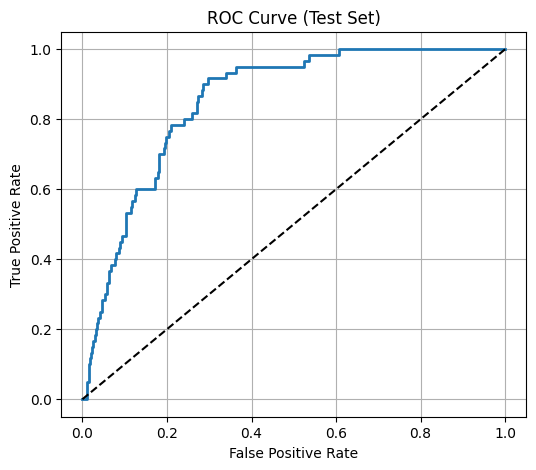

In [82]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--')   # diagonal line (baseline)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.grid(True)
plt.show()

## Training Decision Trees with Scikit-Learn

In [83]:
# ============================================
#  IMPORTS
# ============================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# ============================================
#  K-FOLD SETUP
# ============================================
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []
roc_curves = []   # stores (fpr, tpr) per fold

# ============================================
#  K-FOLD LOOP (ROC ONLY)
# ============================================
for fold, (train_idx, val_idx) in enumerate(kfold.split(df_full_train), start=1):

    # Split fold
    df_train_fold = df_full_train.iloc[train_idx].copy()
    df_val_fold   = df_full_train.iloc[val_idx].copy()

    # Extract target
    y_train = df_train_fold.stroke.values
    y_val   = df_val_fold.stroke.values

    # Remove target column
    df_train_fold = df_train_fold.drop(columns=["stroke"])
    df_val_fold   = df_val_fold.drop(columns=["stroke"])

    # Dict → one-hot encode
    train_dict = df_train_fold.to_dict(orient='records')
    val_dict   = df_val_fold.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    X_val   = dv.transform(val_dict)

    # Standardize numerical features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val   = scaler.transform(X_val)

    # Train Decision Tree
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    # Predict probabilities
    y_pred = dt.predict_proba(X_val)[:, 1]

    # ROC-AUC
    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)

    print(f"Fold {fold} → ROC-AUC: {auc:.4f}")

    # Save ROC curve points
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    roc_curves.append((fpr, tpr))

# ============================================
#  FINAL MEAN PERFORMANCE
# ============================================
print("\n========================")
print("Mean ROC-AUC:", np.mean(auc_scores))
print("========================")

Fold 1 → ROC-AUC: 0.5416
Fold 2 → ROC-AUC: 0.5423
Fold 3 → ROC-AUC: 0.5941
Fold 4 → ROC-AUC: 0.5539
Fold 5 → ROC-AUC: 0.5967

Mean ROC-AUC: 0.5657483322063956


## Decision Tree parameter tuning

In [68]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
from itertools import product

# ===============================================
# 1. SEARCH SPACE (hyperparameters you will tune)
# ===============================================
max_depths = [3, 5, 7, 10, None]        # None = unlimited depth
min_samples_splits = [2, 5, 10, 20]     # controls splitting sensitivity
min_samples_leafs = [1, 5, 10, 20]      # controls leaf size

results = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# ==================================================================
# 2. GRID SEARCH → try all combinations of hyperparameters
# ==================================================================
for max_d, min_split, min_leaf in product(max_depths, min_samples_splits, min_samples_leafs):

    fold_scores = []

    # ===============================================
    # 3. K-Fold
    # ===============================================
    for train_idx, val_idx in kfold.split(df_full_train):

        df_train_fold = df_full_train.iloc[train_idx].copy()
        df_val_fold   = df_full_train.iloc[val_idx].copy()

        # target
        y_train = df_train_fold.stroke.values
        y_val   = df_val_fold.stroke.values

        # remove target
        df_train_fold = df_train_fold.drop(columns=["stroke"])
        df_val_fold   = df_val_fold.drop(columns=["stroke"])

        # One-hot encode
        train_dict = df_train_fold.to_dict(orient='records')
        val_dict   = df_val_fold.to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(train_dict)
        X_val   = dv.transform(val_dict)

        # Scaling is NOT required for decision trees,
        # but keeping it to match your pipeline
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val   = scaler.transform(X_val)

        # ===============================================
        # 4. Train Decision Tree
        # ===============================================
        dt = DecisionTreeClassifier(
            max_depth=max_d,
            min_samples_split=min_split,
            min_samples_leaf=min_leaf,
            random_state=1
        )

        dt.fit(X_train, y_train)

        # validation prediction
        y_pred = dt.predict_proba(X_val)[:, 1]

        auc = roc_auc_score(y_val, y_pred)
        fold_scores.append(auc)

    # mean AUC for this hyperparameter set
    mean_auc = np.mean(fold_scores)
    results.append((max_d, min_split, min_leaf, mean_auc))


# ======================================================
# 5. BEST PARAMETERS
# ======================================================
best = max(results, key=lambda x: x[3])

print("\n==============================")
print("BEST PARAMETERS:")
print(f"max_depth        = {best[0]}")
print(f"min_samples_split= {best[1]}")
print(f"min_samples_leaf = {best[2]}")
print(f"ROC-AUC          = {best[3]:.4f}")
print("==============================")


BEST PARAMETERS:
max_depth        = 3
min_samples_split= 2
min_samples_leaf = 20
ROC-AUC          = 0.8114


## Final Model Evaluation — Decision Tree (Best Hyperparameters Applied)

In [81]:
# ======================================================
#  FINAL TESTING FOR DECISION TREE (Using Best Params)
# ======================================================

from sklearn.metrics import (
    roc_auc_score,
    precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt

# ------------------------------------------------------
# STEP 1 — Fix missing BMI in TEST set
# ------------------------------------------------------
bmi_median = df_full_train["bmi"].median()
df_test["bmi"] = df_test["bmi"].fillna(bmi_median)

# ------------------------------------------------------
# STEP 2 — Prepare full train and test sets
# ------------------------------------------------------
X_train_dict = df_full_train.drop(columns=["stroke"]).to_dict(orient='records')
X_test_dict  = df_test.drop(columns=["stroke"]).to_dict(orient='records')

y_train_full = df_full_train.stroke.values
y_test       = df_test.stroke.values

# Vectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(X_train_dict)
X_test  = dv.transform(X_test_dict)

# Scaling (kept for pipeline consistency)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ------------------------------------------------------
# STEP 3 — Train Decision Tree using BEST HYPERPARAMETERS
# ------------------------------------------------------
dt = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=20,
    class_weight="balanced",
    random_state=1
)

dt.fit(X_train, y_train_full)

print("Final Decision Tree model trained with best hyperparameters!")

# ------------------------------------------------------
# STEP 4 — Evaluate on TEST SET
# ------------------------------------------------------
y_test_prob = dt.predict_proba(X_test)[:, 1]   # probabilities
y_test_pred = dt.predict(X_test)               # class labels

roc_auc  = roc_auc_score(y_test, y_test_prob)
precision = precision_score(y_test, y_test_pred)
recall    = recall_score(y_test, y_test_pred)
f1        = f1_score(y_test, y_test_pred)
cm        = confusion_matrix(y_test, y_test_pred)

print("\n=========== FINAL TEST RESULTS (Decision Tree) ===========")
print(f"ROC-AUC:   {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("==========================================================\n")

Final Decision Tree model trained with best hyperparameters!

=========== FINAL TEST RESULTS (Decision Tree) ===========
ROC-AUC:   0.8251
Precision: 0.1378
Recall:    0.9000
F1-score:  0.2389

Confusion Matrix:
 [[624 338]
 [  6  54]]



## Training Random Forest with Scikit-Learn

In [84]:
# ============================================
#  IMPORTS
# ============================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# ============================================
#  K-FOLD SETUP
# ============================================
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

auc_scores = []
roc_curves = []   # stores (fpr, tpr) per fold

# ============================================
#  K-FOLD LOOP (ROC ONLY)
# ============================================
for fold, (train_idx, val_idx) in enumerate(kfold.split(df_full_train), start=1):

    # Split data
    df_train_fold = df_full_train.iloc[train_idx].copy()
    df_val_fold   = df_full_train.iloc[val_idx].copy()

    # Extract target
    y_train = df_train_fold.stroke.values
    y_val   = df_val_fold.stroke.values

    # Remove target column
    df_train_fold = df_train_fold.drop(columns=["stroke"])
    df_val_fold   = df_val_fold.drop(columns=["stroke"])

    # Dict → One-hot encode
    train_dict = df_train_fold.to_dict(orient='records')
    val_dict   = df_val_fold.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    X_val   = dv.transform(val_dict)

    # Standardize numerical features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val   = scaler.transform(X_val)

    # Train Random Forest
    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=1
    )
    rf.fit(X_train, y_train)

    # Predict probabilities
    y_pred = rf.predict_proba(X_val)[:, 1]

    # ROC-AUC
    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)

    print(f"Fold {fold} → ROC-AUC: {auc:.4f}")

    # Save ROC curve points
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    roc_curves.append((fpr, tpr))

# ============================================
#  FINAL MEAN PERFORMANCE
# ============================================
print("\n========================")
print("Mean ROC-AUC:", np.mean(auc_scores))
print("========================")


Fold 1 → ROC-AUC: 0.8051
Fold 2 → ROC-AUC: 0.8119
Fold 3 → ROC-AUC: 0.8412
Fold 4 → ROC-AUC: 0.8236
Fold 5 → ROC-AUC: 0.7950

Mean ROC-AUC: 0.8153688378750052


## Random Forest parameter tuning

In [86]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import numpy as np
from itertools import product

# ===============================================
# 1. SEARCH SPACE (hyperparameters you will tune)
# ===============================================
n_estimators_list = [100, 200, 300]
max_depths = [5, 10, 15, None]         # None → unlimited depth
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 5]

results = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# ==================================================================
# 2. GRID SEARCH → try all combinations of hyperparameters
# ==================================================================
for n_est, max_d, min_split, min_leaf in product(
    n_estimators_list, max_depths, min_samples_splits, min_samples_leafs
):

    fold_scores = []

    # ===============================================
    # 3. K-Fold
    # ===============================================
    for train_idx, val_idx in kfold.split(df_full_train):

        df_train_fold = df_full_train.iloc[train_idx].copy()
        df_val_fold   = df_full_train.iloc[val_idx].copy()

        # target
        y_train = df_train_fold.stroke.values
        y_val   = df_val_fold.stroke.values

        # remove target
        df_train_fold = df_train_fold.drop(columns=["stroke"])
        df_val_fold   = df_val_fold.drop(columns=["stroke"])

        # One-hot encode
        train_dict = df_train_fold.to_dict(orient='records')
        val_dict   = df_val_fold.to_dict(orient='records')

        dv = DictVectorizer(sparse=False)
        X_train = dv.fit_transform(train_dict)
        X_val   = dv.transform(val_dict)

        # Scaling only for consistency with your pipeline
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_val   = scaler.transform(X_val)

        # ===============================================
        # 4. Train Random Forest
        # ===============================================
        rf = RandomForestClassifier(
            n_estimators=n_est,
            max_depth=max_d,
            min_samples_split=min_split,
            min_samples_leaf=min_leaf,
            random_state=1,
            n_jobs=-1
        )

        rf.fit(X_train, y_train)

        # validation prediction
        y_pred = rf.predict_proba(X_val)[:, 1]

        auc = roc_auc_score(y_val, y_pred)
        fold_scores.append(auc)

    # mean AUC for this hyperparameter set
    mean_auc = np.mean(fold_scores)
    results.append((n_est, max_d, min_split, min_leaf, mean_auc))


# ======================================================
# 5. BEST PARAMETERS
# ======================================================
best = max(results, key=lambda x: x[4])

print("\n==============================")
print("BEST PARAMETERS:")
print(f"n_estimators      = {best[0]}")
print(f"max_depth         = {best[1]}")
print(f"min_samples_split = {best[2]}")
print(f"min_samples_leaf  = {best[3]}")
print(f"ROC-AUC           = {best[4]:.4f}")
print("==============================")


BEST PARAMETERS:
n_estimators      = 100
max_depth         = 5
min_samples_split = 2
min_samples_leaf  = 5
ROC-AUC           = 0.8290


In [87]:
# ======================================================
#  FINAL TESTING FOR RANDOM FOREST (Using Best Params)
# ======================================================

from sklearn.metrics import (
    roc_auc_score,
    precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve
)
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# ------------------------------------------------------
# STEP 1 — Fix missing BMI in TEST set (same rule as train)
# ------------------------------------------------------
bmi_median = df_full_train["bmi"].median()
df_test["bmi"] = df_test["bmi"].fillna(bmi_median)

# ------------------------------------------------------
# STEP 2 — Prepare full train and test sets
# ------------------------------------------------------
X_train_dict = df_full_train.drop(columns=["stroke"]).to_dict(orient='records')
X_test_dict  = df_test.drop(columns=["stroke"]).to_dict(orient='records')

y_train_full = df_full_train.stroke.values
y_test       = df_test.stroke.values

# Vectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(X_train_dict)
X_test  = dv.transform(X_test_dict)

# Scaling (for consistency with your pipeline)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# ------------------------------------------------------
# STEP 3 — Train Random Forest with BEST HYPERPARAMETERS
# ------------------------------------------------------
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=5,
    class_weight="balanced",     # helpful for imbalanced stroke data
    random_state=1,
    n_jobs=-1
)

rf.fit(X_train, y_train_full)

print("Final Random Forest model trained with best hyperparameters!")

# ------------------------------------------------------
# STEP 4 — Evaluate on TEST SET
# ------------------------------------------------------
y_test_prob = rf.predict_proba(X_test)[:, 1]   # probabilities
y_test_pred = rf.predict(X_test)               # hard labels

roc_auc  = roc_auc_score(y_test, y_test_prob)
precision = precision_score(y_test, y_test_pred)
recall    = recall_score(y_test, y_test_pred)
f1        = f1_score(y_test, y_test_pred)
cm        = confusion_matrix(y_test, y_test_pred)

print("\n=========== FINAL TEST RESULTS (Random Forest) ===========")
print(f"ROC-AUC:   {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("==========================================================\n")

Final Random Forest model trained with best hyperparameters!

=========== FINAL TEST RESULTS (Random Forest) ===========
ROC-AUC:   0.8460
Precision: 0.1643
Recall:    0.7667
F1-score:  0.2706

Confusion Matrix:
 [[728 234]
 [ 14  46]]

